In [1]:
import pandas as pd
import numpy as np

### 실제 관측 데이터

In [2]:
Energy_raw = pd.read_csv('Global primary energy consumption.csv')
Energy_raw['Total'] = Energy_raw.iloc[:,3:].sum(axis=1)
Energy_raw = Energy_raw[['Year', 'Total']]
Energy_raw = Energy_raw.loc[Energy_raw['Year'] < 2020]

Years = Energy_raw['Year'].astype(int).to_list()
Energy_raw.rename(columns={'Year':'ds', 'Total':'Consumption'}, inplace=True)
Energy_raw['ds'] = Energy_raw['ds'].astype('str') + ['-01-01' for i in range(len(Energy_raw['ds']))]

for y in range(1979,2020):    
    for m in range(1,13):
        if y in Years and m == 1:
            continue

        year = str(y)
        month = str(m)
        day = '01'
        
        new_date = year+'-'+month+'-'+day
        if m < 10:
            new_date = year+'-'+'0'+month+'-'+day
        
        new_row = {'ds': [new_date], 'Consumption' : [np.NaN]}
        Energy_raw = pd.concat([Energy_raw, pd.DataFrame(new_row)], axis=0)

Energy_raw['ds'] = pd.to_datetime(Energy_raw['ds'])
Energy_raw.sort_values('ds', inplace=True)
Energy_raw.set_index('ds', inplace=True)
Energy_raw.interpolate(method='time', inplace=True)
Energy_raw

,Consumption
ds,
1800-01-01,5653.00000
1810-01-01,5961.00000
1820-01-01,6264.00000
1830-01-01,6653.00000
1840-01-01,7300.00000
...,...
2019-08-01,158173.83861
2019-09-01,158173.83861
2019-10-01,158173.83861


### 시나리오 데이터

In [3]:
# 데이터 불러오기
ipcc_scenario = pd.read_csv("ipcc-scenarios.csv")

# 시나리오 및 2020 이상 데이터만
SSP_index = ipcc_scenario.loc[:,"Scenario"] == "SSP1 - Baseline"
UPPER_2020_index = ipcc_scenario.loc[:,"Year"] >= 2020

tmp_Energy_scenario = ipcc_scenario.loc[SSP_index & UPPER_2020_index, ['Year','Primary energy']]
tmp_Energy_scenario.rename(columns={'Year':'ds', 'Primary energy':'Consumption'}, inplace=True)
tmp_Energy_scenario['ds'] = [str(i) + '-01'+'-01' for i in tmp_Energy_scenario['ds'].to_list()]

latest_Energy_index = 0
for y in range(2020,2100):
    
    for m in range(1,13):
        if y%10 == 0 and m == 1:
            continue
        year = str(y)
        month = str(m)
        day = '01'
        
        new_date = year+'-'+month+'-'+day
        if m < 10:
            new_date = year+'-'+'0'+month+'-'+day
        
        new_row = {'ds': [new_date], 'Consumption' : [np.NaN]}
        tmp_Energy_scenario = pd.concat([tmp_Energy_scenario, pd.DataFrame(new_row)], axis=0)
    
    if y%10 == 0:
        latest_Energy_index += 1

tmp_Energy_scenario['ds'] = pd.to_datetime(tmp_Energy_scenario['ds'])
tmp_Energy_scenario.sort_values('ds', inplace=True)
tmp_Energy_scenario.set_index('ds', inplace=True, drop=True)
tmp_Energy_scenario.interpolate(method='time', inplace=True)
tmp_Energy_scenario

,Consumption
ds,
2020-01-01,155872.485809
2020-02-01,156022.489398
2020-03-01,156162.815337
2020-04-01,156312.818926
2020-05-01,156457.983690
...,...
2099-09-01,195041.885128
2099-10-01,194940.460884
2099-11-01,194835.655832


,Consumption
ds,
1979-01-01,83959.401570
1979-02-01,83890.300448
1979-03-01,83827.886531
1979-04-01,83758.785409
1979-05-01,83691.913355
...,...
2099-09-01,195041.885128
2099-10-01,194940.460884
2099-11-01,194835.655832


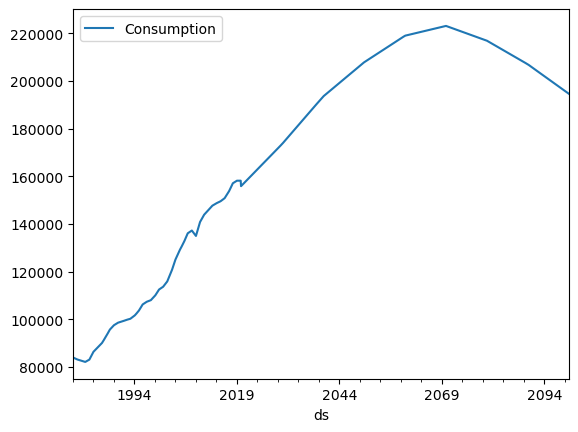

In [4]:
total = pd.concat([Energy_raw, tmp_Energy_scenario], axis=0)

upper_idx = total.index >= pd.to_datetime('1979')
total = total.loc[upper_idx, :]
display(total)
total.plot()

total.to_csv('SSP1_Energy_data.csv')